In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
import requests
url = 'https://api.meteostat.net/v1/history/daily?station=KMGJ0&start=2018-05-01&end=2018-10-30&key=XgbQJd6C'
data = requests.get(url).json()
data.keys()
df = pd.DataFrame(data['data'])
df.head(10)

,date,peakgust,precipitation,pressure,snowdepth,snowfall,sunshine,temperature,temperature_max,temperature_min,winddirection,windspeed
0,2018-05-01,None,0.0,1016.4,None,None,None,14.8,26.1,3.9,NaN,10.8
1,2018-05-02,None,0.0,1015.6,None,None,None,21.3,32.2,7.8,NaN,14.2
2,2018-05-03,None,NaN,NaN,None,None,None,23.4,32.2,15.0,NaN,16.6
3,2018-05-04,None,NaN,1010.8,None,None,None,22.5,27.2,17.2,NaN,16.4
4,2018-05-05,None,0.0,1016.2,None,None,None,19.1,24.4,12.8,NaN,16.1
5,2018-05-06,None,NaN,1015.0,None,None,None,14.6,18.3,12.2,NaN,9.0
6,2018-05-07,None,NaN,NaN,None,None,None,13.7,21.1,7.8,NaN,5.7
7,2018-05-09,None,0.0,1019.8,None,None,None,17.0,26.1,6.7,NaN,7.5
8,2018-05-10,None,NaN,NaN,None,None,None,15.0,22.2,6.7,NaN,9.3
9,2018-05-11,None,0.3,1015.1,None,None,None,15.7,20.6,11.7,NaN,10.4


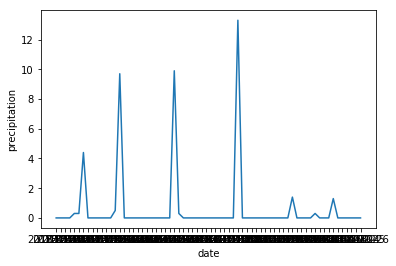

In [25]:
sns.lineplot(x="date", y="precipitation", data=df)

In [4]:
df_rain = df[(df['precipitation']>0)]
df_rain.head()

,date,peakgust,precipitation,pressure,snowdepth,snowfall,sunshine,temperature,temperature_max,temperature_min,winddirection,windspeed
9,2018-05-11,None,0.3,1015.1,None,None,None,15.7,20.6,11.7,NaN,10.4
12,2018-05-14,None,0.3,1014.5,None,None,None,16.3,24.4,10.6,NaN,NaN
14,2018-05-17,None,4.4,1016.4,None,None,None,16.9,22.8,13.9,NaN,2.5
29,2018-06-02,None,0.5,NaN,None,None,None,22.9,27.8,18.3,NaN,10.7
31,2018-06-04,None,9.7,1008.5,None,None,None,14.6,20.6,10.0,NaN,5.7
50,2018-06-24,None,9.9,1009.0,None,None,None,21.4,29.4,16.1,NaN,8.3
51,2018-06-25,None,0.3,1015.5,None,None,None,20.9,26.7,13.3,NaN,10.7
87,2018-08-03,None,13.3,NaN,None,None,None,23.9,29.4,21.1,NaN,6.0
124,2018-09-09,None,1.4,1024.0,None,None,None,12.9,14.4,11.7,36.0,14.6


In [5]:
df['precipitation'].describe()

count    56.000000
mean      0.716071
std       2.565915
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      13.300000
Name: precipitation, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
date               141 non-null object
peakgust           0 non-null object
precipitation      56 non-null float64
pressure           107 non-null float64
snowdepth          0 non-null object
snowfall           0 non-null object
sunshine           0 non-null object
temperature        139 non-null float64
temperature_max    139 non-null float64
temperature_min    139 non-null float64
winddirection      6 non-null float64
windspeed          129 non-null float64
dtypes: float64(7), object(5)
memory usage: 13.3+ KB


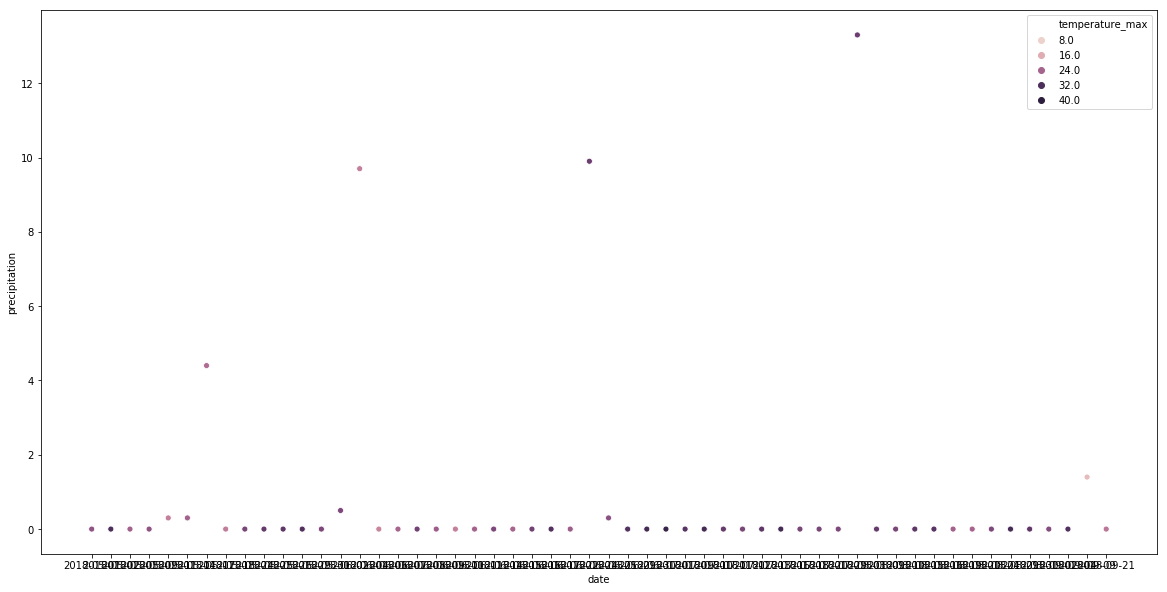

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="date", y="precipitation", hue='temperature_max', data=df)

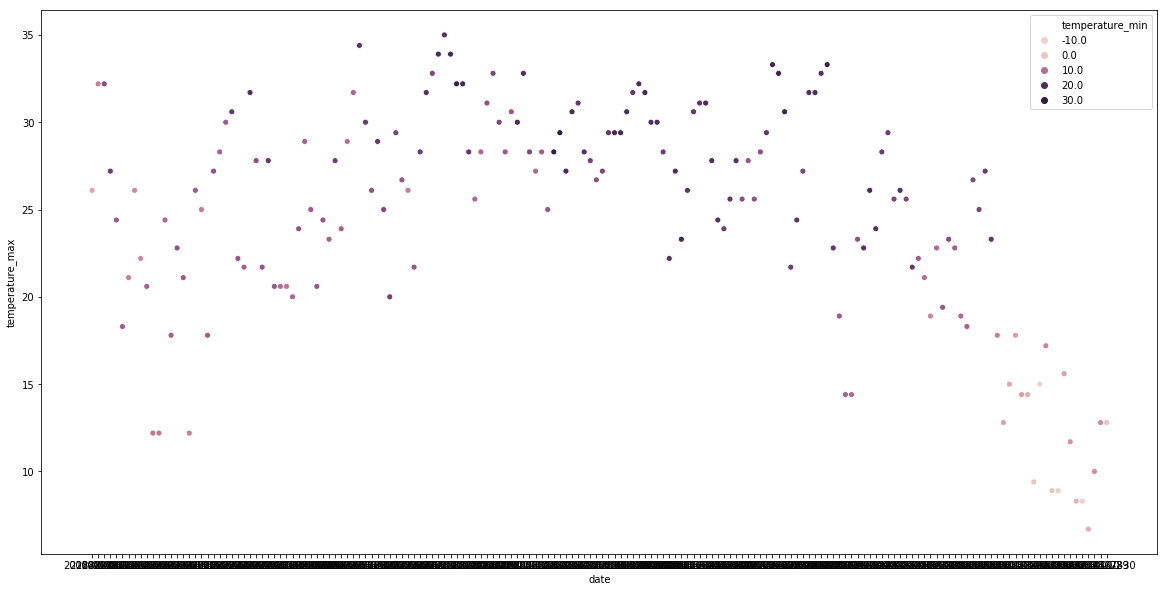

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="date", y="temperature_max", hue='temperature_min', data=df)

In [23]:
# grab every saturday
# time series map